### UpGrad Assignment  Bank Marketing

In [1]:
# import the required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


In [2]:
# laod the dataset
data = pd.read_csv("bank-additional-full.csv",sep=';')
data.head() 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.shape

(41188, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# check null value
data.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## EDA 

In [7]:
data.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


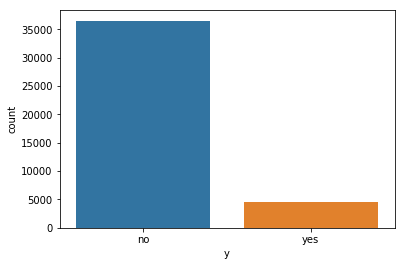

In [8]:
sns.countplot(data=data,x=data['y'])
plt.show()

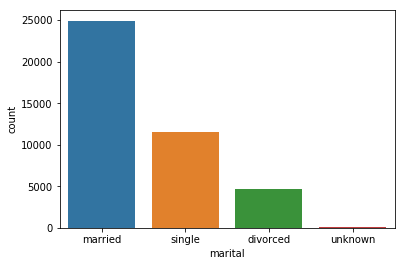

In [9]:
sns.countplot(data = data,x = data.marital)
plt.show()

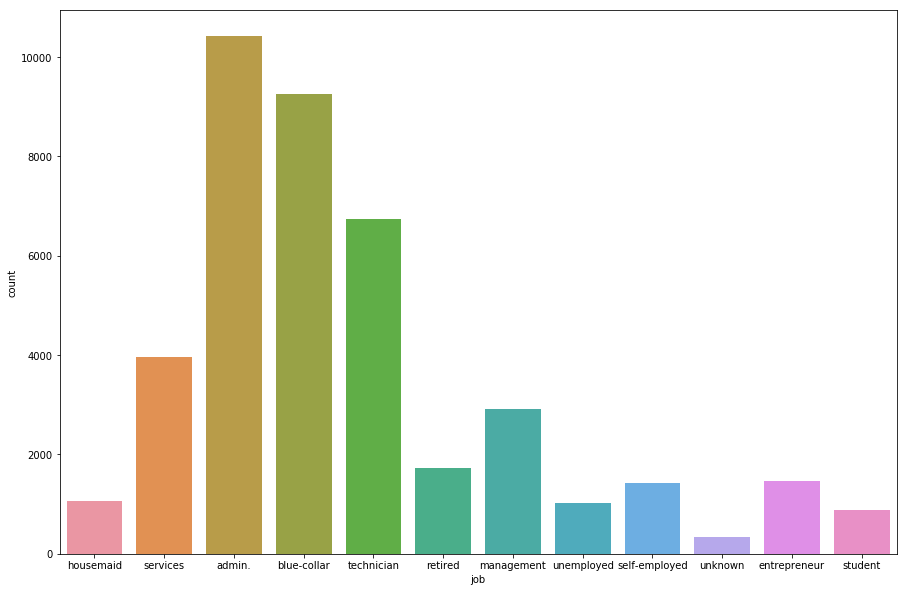

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.job)
plt.show()

In [11]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

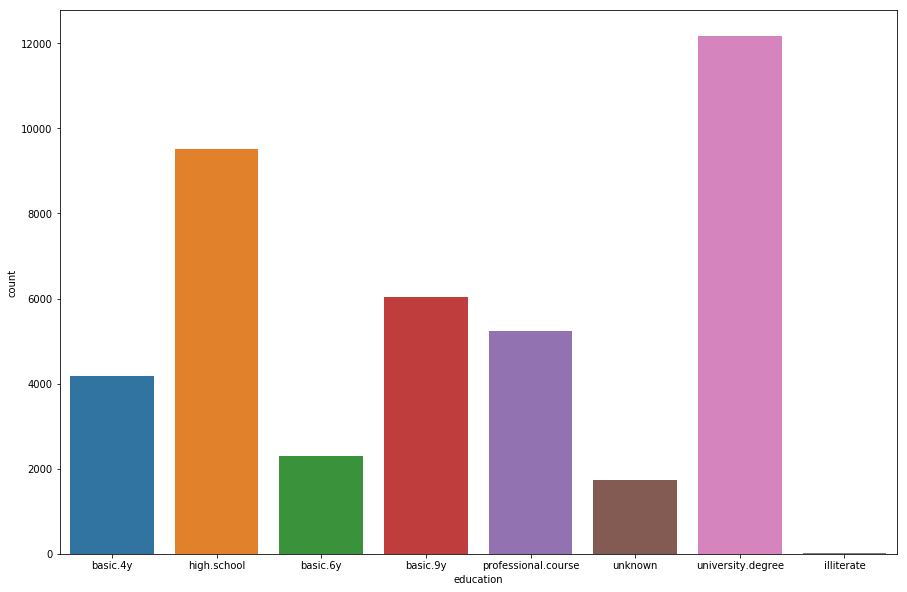

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.education)
plt.show()

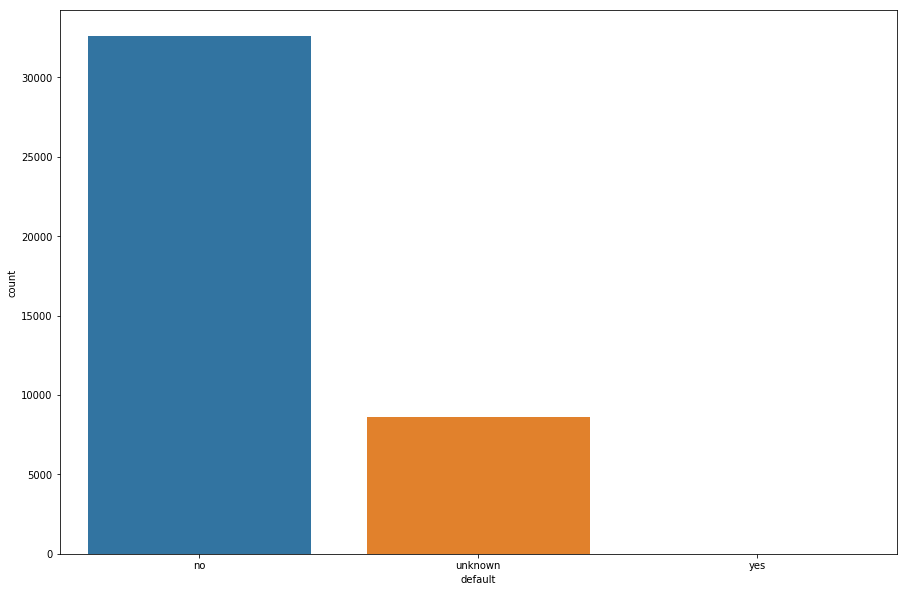

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.default)
plt.show()

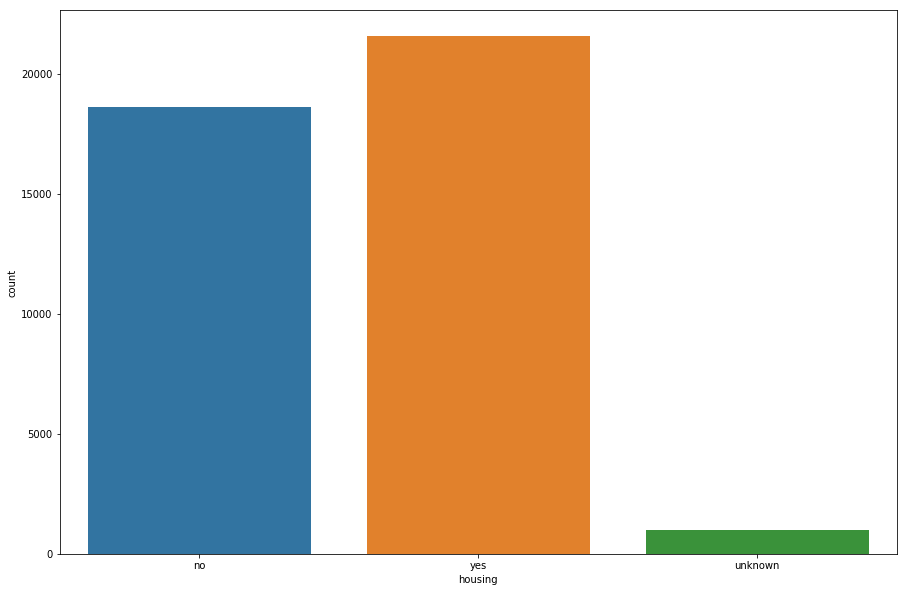

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.housing)
plt.show()

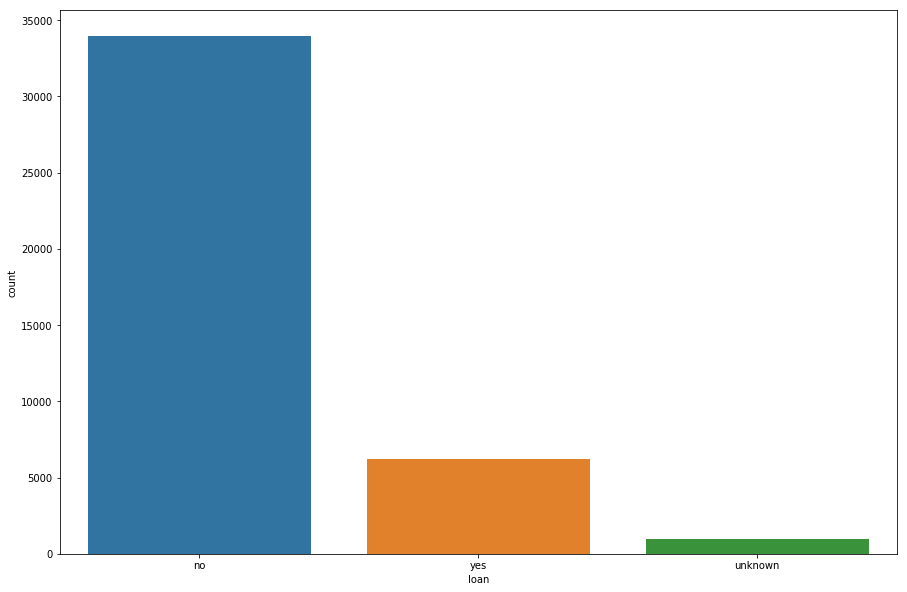

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.loan)
plt.show()

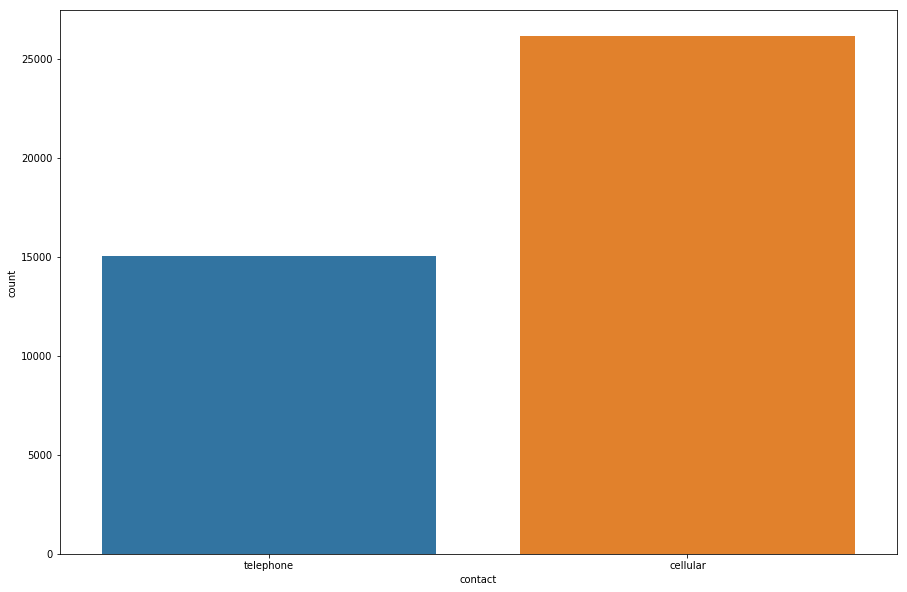

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.contact)
plt.show()

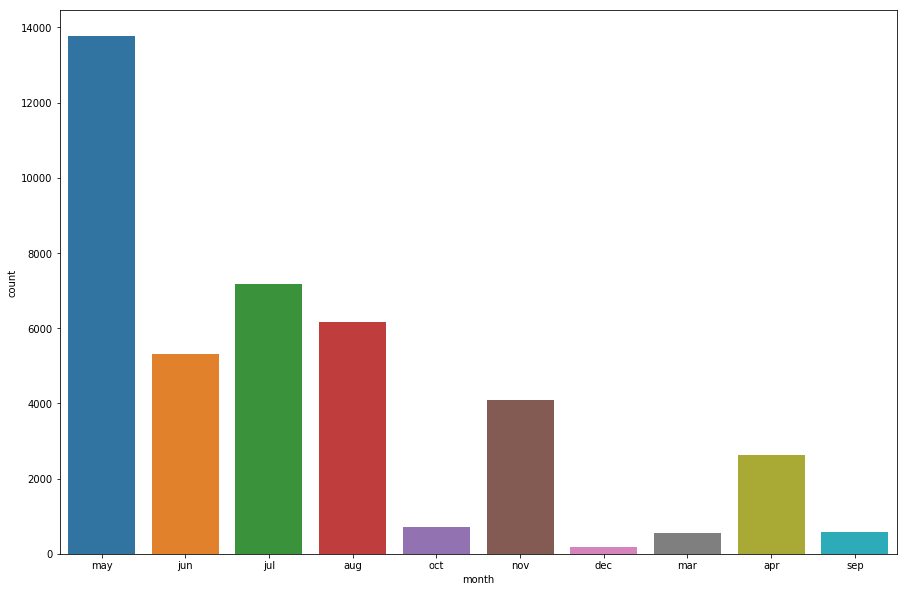

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.month)
plt.show()

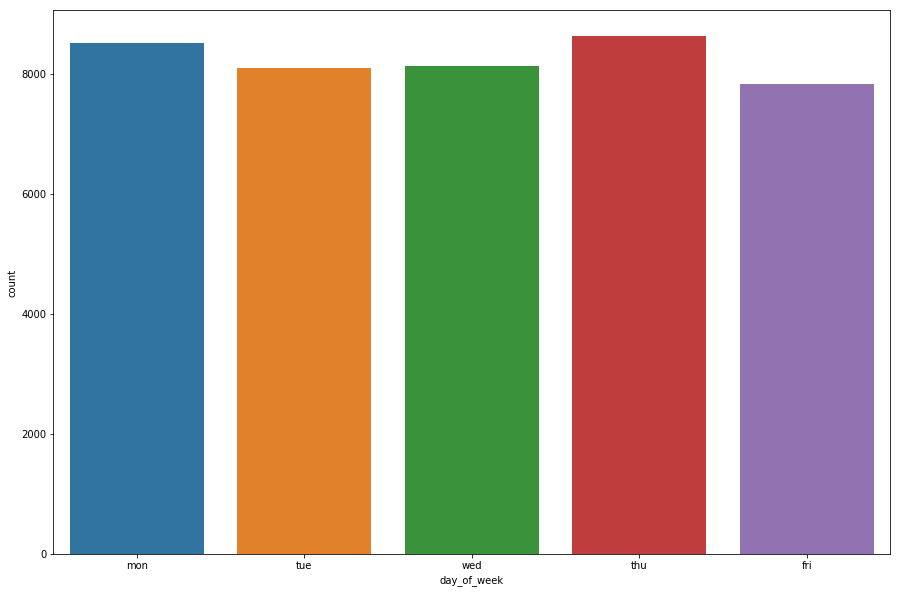

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.day_of_week)
plt.show()

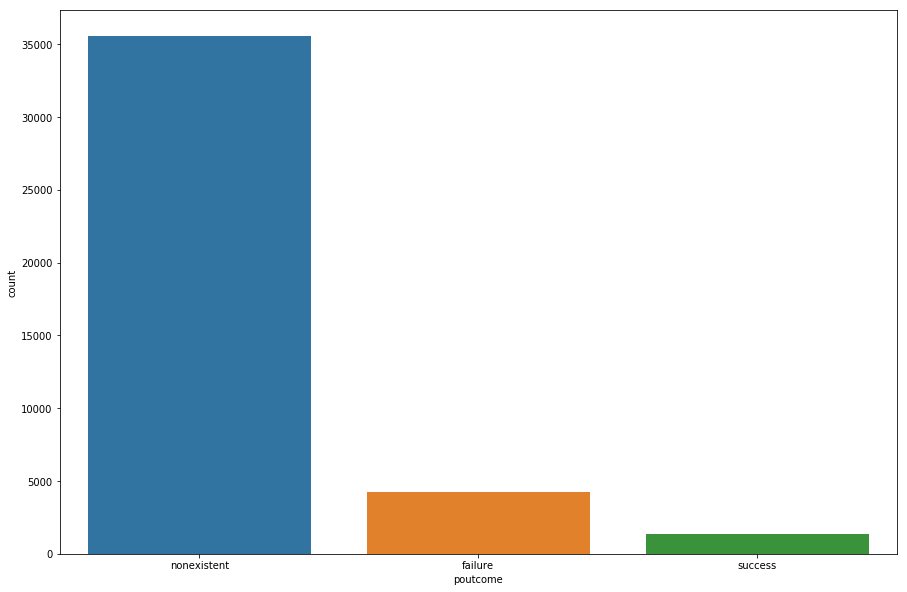

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = data.poutcome)
plt.show()

### Multivariate analysis

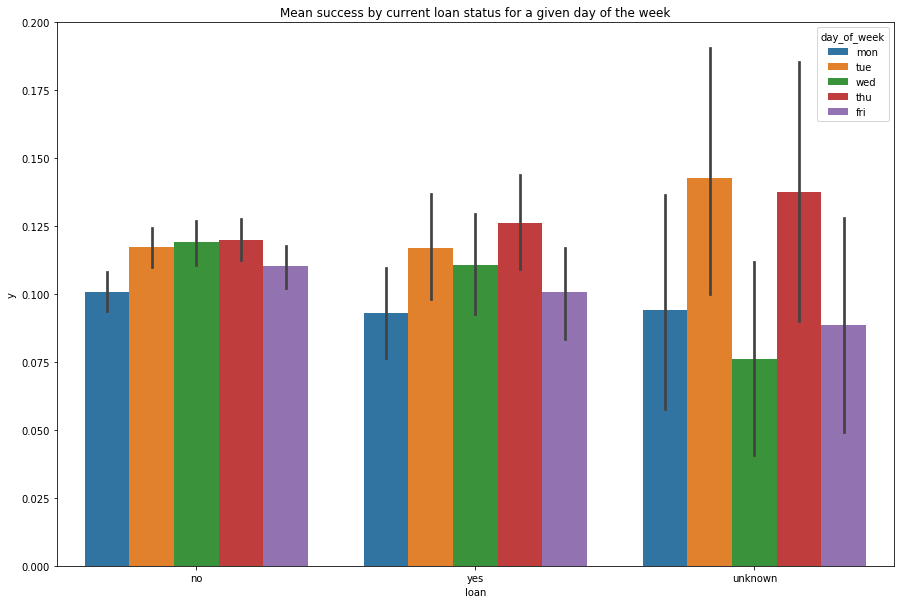

In [20]:
#Label Encoding the class attribute
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

label_encoder = LabelEncoder()
label_encoder.fit(data["y"])
data["y"] = label_encoder.transform(data["y"])

plt.figure(figsize=(15,10))
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = data)
plt.title('Mean success by current loan status for a given day of the week')
plt.show()

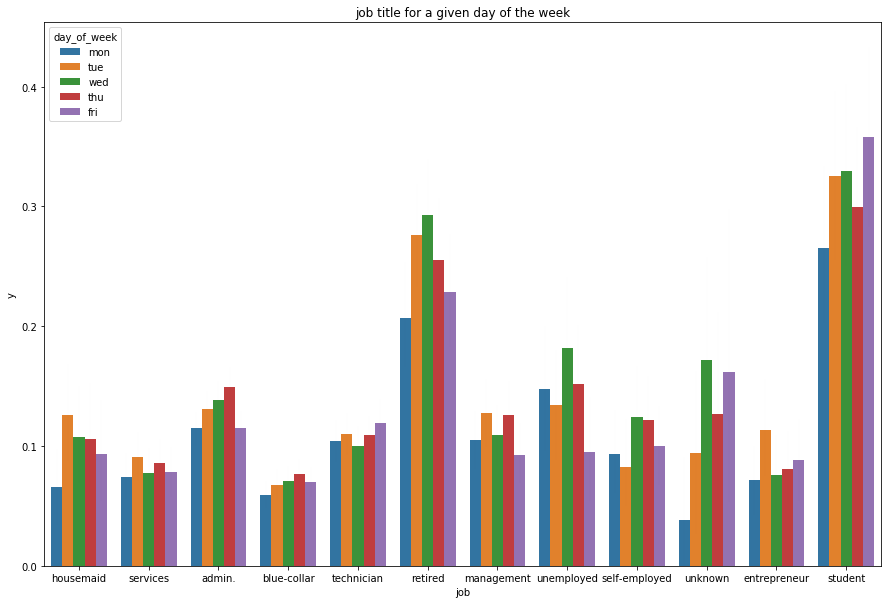

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = data,ci=95, errwidth = 0.01)
plt.title('job title for a given day of the week')
plt.show()

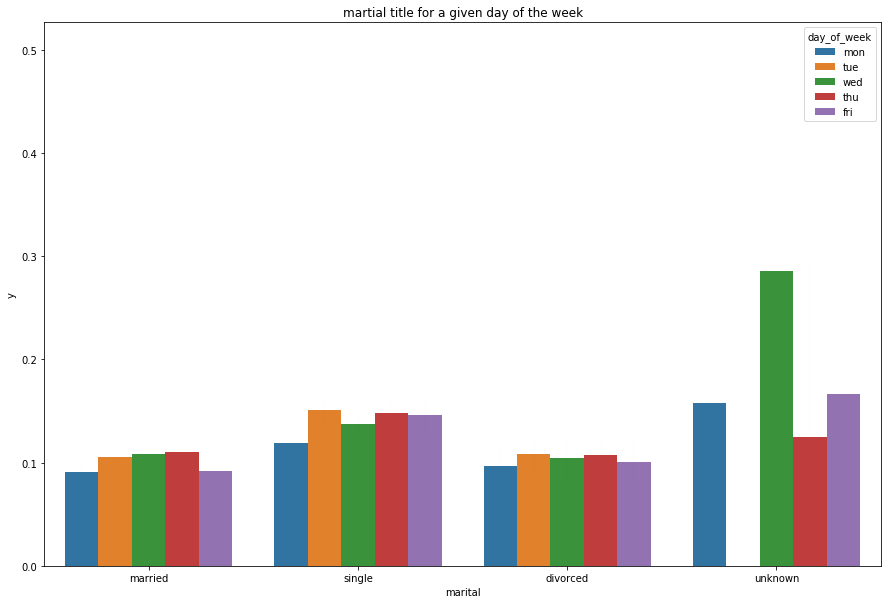

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'marital', y = 'y', hue = 'day_of_week', data = data,ci=95, errwidth = 0.01)
plt.title('martial title for a given day of the week')
plt.show()

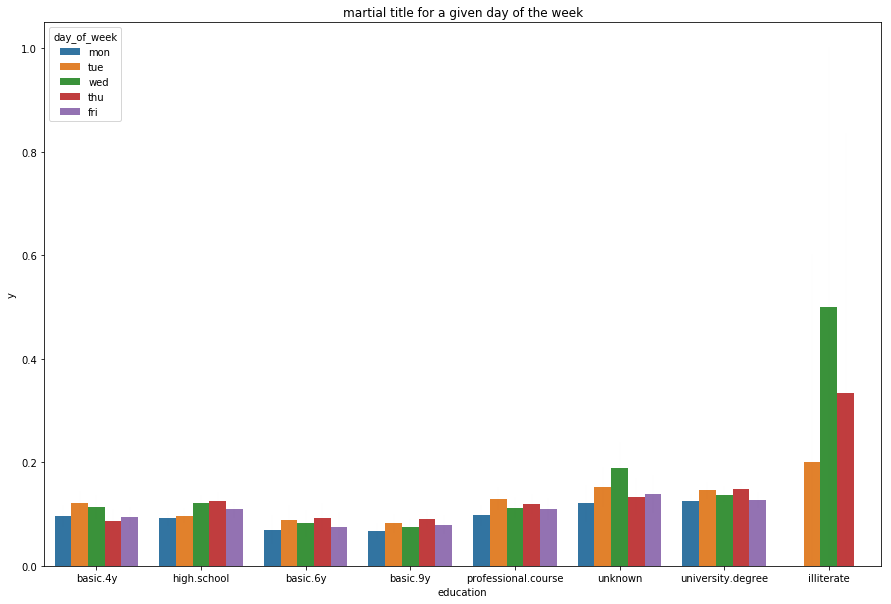

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = data,ci=95, errwidth = 0.01)
plt.title('martial title for a given day of the week')
plt.show()

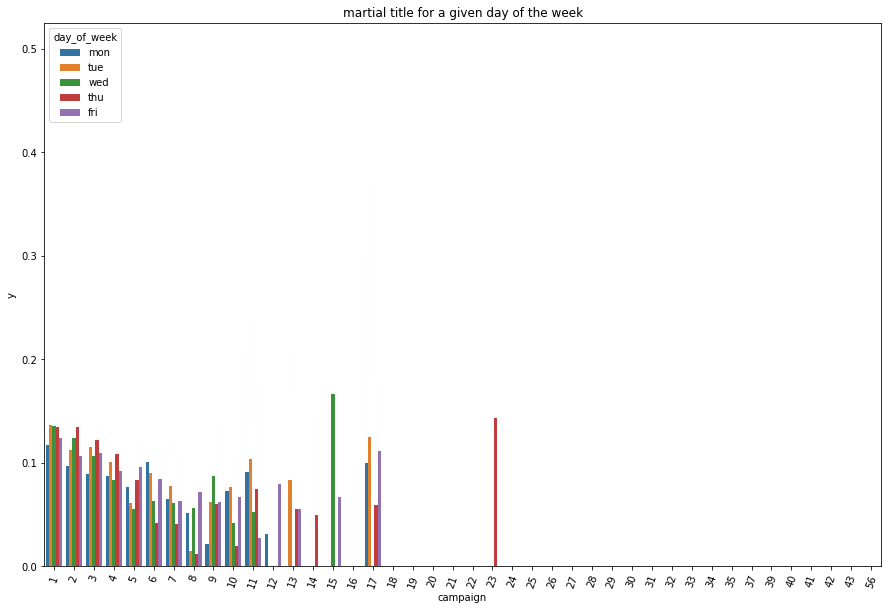

In [24]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=70)
sns.barplot(x = 'campaign', y = 'y', hue = 'day_of_week', data = data,ci=95, errwidth = 0.01)
plt.title('martial title for a given day of the week')
plt.show()


In [25]:
data["dur"] = pd.Series(data["duration"] != 0)

In [26]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,dur
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,True
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,True


# Label Encoding the Binary Attributes

In [27]:
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(data[label])
    data[label] = label_encoder.transform(data[label])

In [28]:
# Will be On-Hot Encoded Later
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day_of_week']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(data[label])
    data[label] = label_encoder.transform(data[label])

In [29]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,dur
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,True
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,True


In [30]:
data_corr = data.corr()

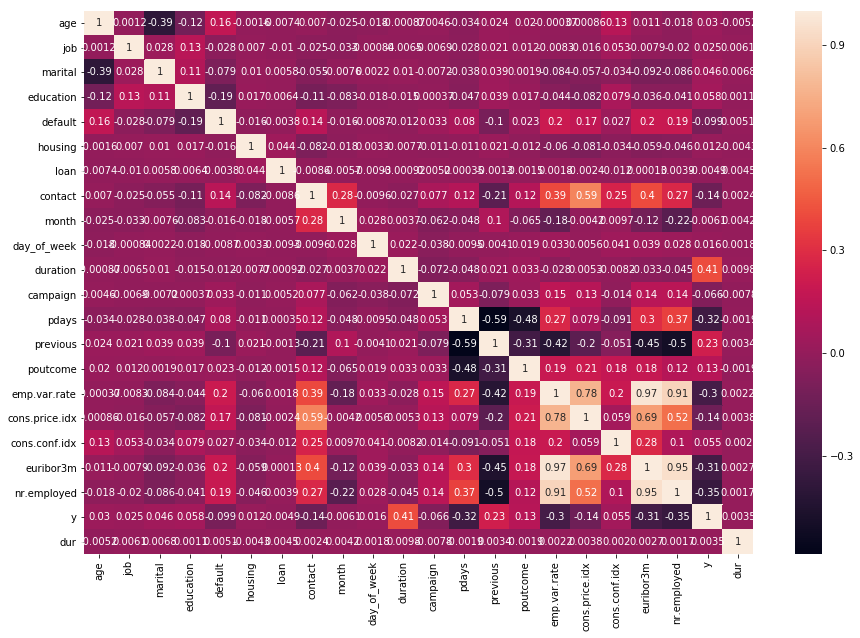

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_corr, annot = True)
plt.show()

- From the above plot we can observe that most of the features are independent of each other.
- Feature-pairs (emp.var.rate - cons.price.idx), (emp.var.rate - euribor3m), (emp.var.rate - nr.employed), (nr.employed - euribor3m) and (cons.price.idx - euribor3m) are highly positively correlated.
- Therefore we can remove "emp.var.rate", "cons.price.idx", "nr.employed"

In [32]:
final_data = data.drop(["emp.var.rate", "cons.price.idx", "nr.employed"], axis = 1)

In [33]:
data_corr = final_data.corr()

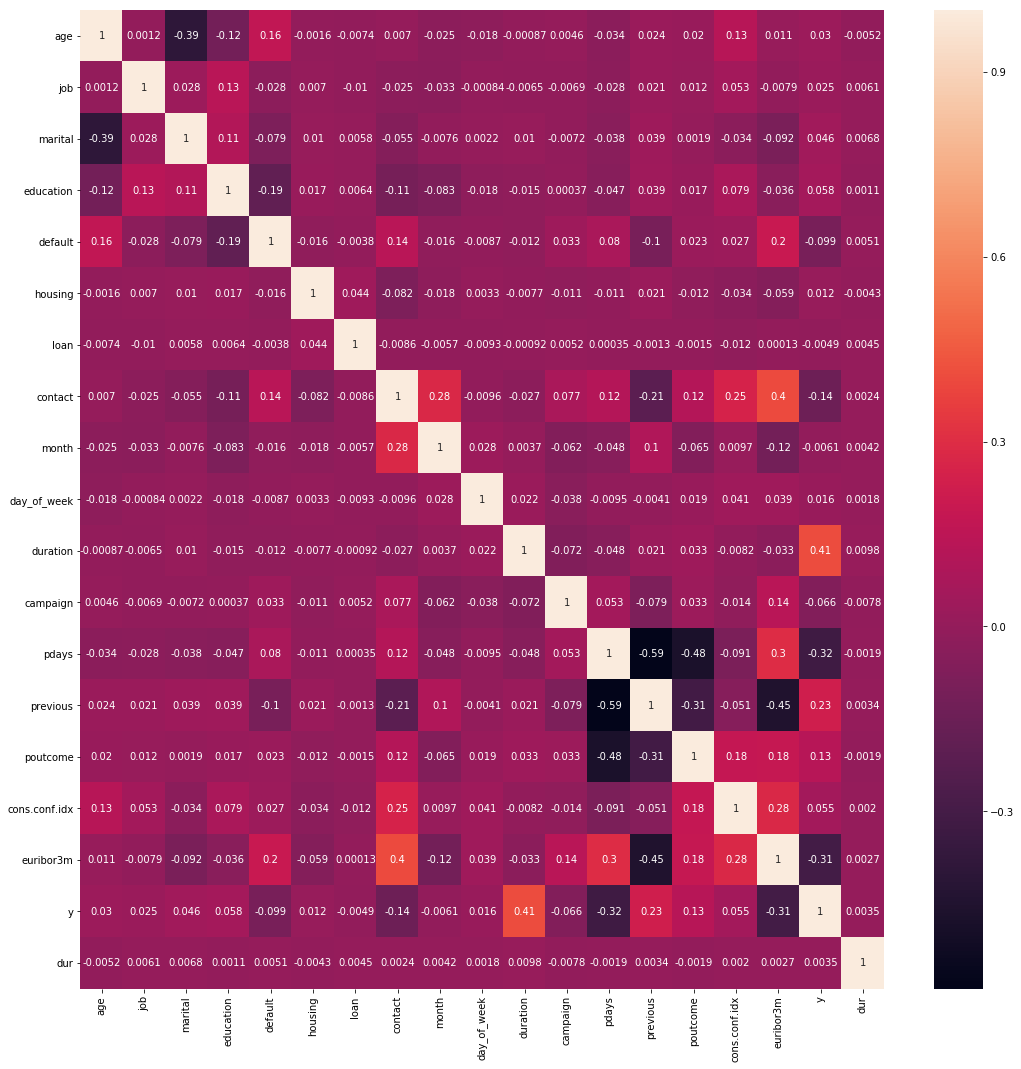

In [34]:
plt.figure(figsize=(18, 18))
sns.heatmap(data_corr, annot = True)
plt.show()

In [35]:
data = pd.get_dummies(final_data, columns = cols)

In [36]:
data.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,y,dur,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,contact_0,contact_1,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,poutcome_0,poutcome_1,poutcome_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,56,0,0,0,261,1,999,0,-36.4,4.857,0,True,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,1,0,0,149,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,2,0,226,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,-36.4,4.857,0,True,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,2,307,1,999,0,-36.4,4.857,0,True,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


# Normalizing the Features

In [37]:
labels = data.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(data.drop(['y'], axis = 1)), columns = data.drop(['y'], axis = 1).columns)

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype bool, uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Splitting Data into Training and Testing data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [39]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [40]:
# DataFrame to store results
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

### Logistic Regression Model

In [41]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'penalty': ['l2'], 'C': [0.01, 0.1, 1.0, 10.0], 'solver': ['sag'], 'max_iter': [100, 200]}, {'penalty': ['l1'], 'C': [0.01, 0.1, 1.0, 10.0], 'solver': ['saga'], 'max_iter': [100, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [42]:
clf.best_params_

{'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [43]:
clf.best_score_

0.5897281755482953

In [44]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.585
Area under ROC on test data is : 0.861
Accuracy on test data is : 0.863


### Random Forest Model

In [45]:
rf = RandomForestClassifier()
base_learner = list(range(1,100,5))
depth = list([2,4,7,8,10,13])
param = {'n_estimators':base_learner,'max_depth':depth} #params we need to try on classifier
gscv = GridSearchCV(rf,param_grid=param,cv=10,verbose=1,scoring='f1',n_jobs=3)
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  73 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done 251 tasks      | elapsed:   34.1s
[Parallel(n_jobs=3)]: Done 501 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 851 tasks      | elapsed:  3.7min


Best HyperParameter:  {'max_depth': 13, 'n_estimators': 1}
Best Accuracy: 48.64%


[Parallel(n_jobs=3)]: Done 1200 out of 1200 | elapsed:  7.0min finished


In [46]:
print(gscv.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [47]:
gscv.best_score_

0.4863501330899443

In [48]:
f1_score(y_test, clf.predict(X_test))

0.5846492838780757

In [49]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.585
Area under ROC on test data is : 0.861
Accuracy on test data is : 0.863


###  AdaBoost Classifier

In [50]:
params = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced"), 
                               LogisticRegression(n_jobs = -1, class_weight = 'balanced', penalty = 'l1', solver = 'saga')], 
            "learning_rate" : [0.01, 0.1, 1.0]
        }
clf = GridSearchCV(estimator = AdaBoostClassifier(n_estimators = 1000), param_grid = params, cv = cv, n_jobs = -1, 
                   scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...        solver='saga', tol=0.0001, verbose=0, warm_start=False)], 'learning_rate': [0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [51]:
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight='balanced', criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), 'learning_rate': 1.0}

In [52]:
clf.best_score_

0.5126555346601296

In [53]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["AdaBoost", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.515
Area under ROC on test data is : 0.721
Accuracy on test data is : 0.894


### XGBoost Model

In [56]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
parameters = {'objective':['binary:logistic'],
               'gamma': [0.5, 1, 1.5, 2, 5],
              'n_estimators': [10,18,30,35,100,200],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7,10,12,14,15],
              'min_child_weight': [1,5,10,14],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              }

xgb_clf = XGBClassifier()
clf = RandomizedSearchCV(xgb_clf,param_distributions=parameters,n_jobs=3,cv=10)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=3,
          param_distributions={'objective': ['binary:logistic'], 'gamma': [0.5, 1, 1.5, 2, 5], 'n_estimators': [10, 18, 30, 35, 100, 200], 'learning_rate': [0.03, 0.05, 0.07], 'max_depth': [5, 6, 7, 10, 12, 14, 15], 'min_child_weight': [1, 5, 10, 14], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [58]:
clf.best_params_

{'subsample': 0.8,
 'objective': 'binary:logistic',
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.03,
 'gamma': 0.5,
 'colsample_bytree': 0.8}

In [59]:
clf.best_score_

0.9172685887708649

In [69]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["XGBoost", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.384
Area under ROC on test data is : 0.714
Accuracy on test data is : 0.766


# Gaussian Naive Bayes

In [70]:
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [71]:
clf.best_score_

0.4333456282447059

In [72]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.420
Area under ROC on test data is : 0.726
Accuracy on test data is : 0.807


# Multinomial Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB
params = {
            "alpha" : [0.0, 0.1, 0.5, 1.0], 
            "fit_prior" : [True, False]
         }
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0, 0.1, 0.5, 1.0], 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [74]:
clf.best_params_

{'alpha': 0.1, 'fit_prior': False}

In [75]:
clf.best_score_

0.39393712706220074

In [76]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Multinomial Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.384
Area under ROC on test data is : 0.714
Accuracy on test data is : 0.766


In [77]:
testing

,Classifier,F1-Score,AUC,Accuracy
0,Multinomial Naive Bayes,0.383728,0.713640,0.766448
1,Gaussian Naive Bayes,0.420401,0.726068,0.806871
2,XGBoost,0.383728,0.713640,0.766448
3,Multinomial Naive Bayes,0.383728,0.713640,0.766448
4,Gaussian Naive Bayes,0.420401,0.726068,0.806871
5,AdaBoost,0.592771,0.748670,0.917941
6,AdaBoost,0.515050,0.721289,0.894392
7,Random Forest,0.584649,0.860548,0.862709
8,Logistic Regression,0.584649,0.860548,0.862709


###  Feature Selection

In [78]:
from sklearn.feature_selection import chi2
chivalues = chi2(features, labels)[0]
chi = pd.DataFrame(list(zip(data.drop(["y"], axis = 1).columns, chivalues)), columns = ["Features", "chi2"])

In [79]:
chi

,Features,chi2
0,age,2.216388
1,default,160.961452
2,housing,2.489367
3,loan,0.793502
4,duration,358.018123
5,campaign,16.140129
6,pdays,157.983753
7,previous,441.453204
8,cons.conf.idx,10.795785
9,euribor3m,890.685536


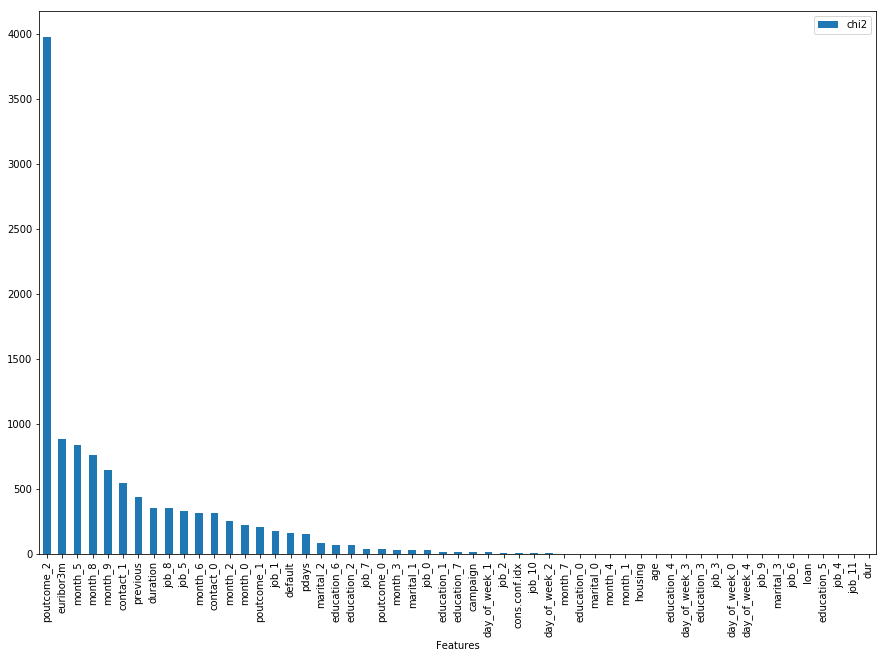

In [80]:
chi.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (15,10))

We can clearly see that the chi2 drops to almost zero after the first 25 features.

In [81]:
from sklearn.feature_selection import SelectKBest
k_best_features = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features, labels))

In [82]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

### After selecting best features

In [83]:
# DataFrame to store results
ktesting = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(k_best_features, labels, test_size=0.2, random_state=1, stratify = labels)

### Logistic Regression

In [85]:
params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'penalty': ['l2'], 'C': [0.01, 0.1, 1.0, 10.0], 'solver': ['sag'], 'max_iter': [100, 200]}, {'penalty': ['l1'], 'C': [0.01, 0.1, 1.0, 10.0], 'solver': ['saga'], 'max_iter': [100, 200]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [86]:
clf.best_params_

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [87]:
clf.best_score_

0.5882910091445162

In [88]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Logistic Regression", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.581
Area under ROC on test data is : 0.860
Accuracy on test data is : 0.861


# Decision Tree Classifier

In [89]:
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [10, 15, 20, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced", presort = True), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 15, 20, None], 'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [90]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [91]:
clf.best_score_

0.57946857969728

In [92]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Decision Tree", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.572
Area under ROC on test data is : 0.828
Accuracy on test data is : 0.869


###  Random Forest Classifier

In [93]:
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [15, 25, None], 'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [94]:
f1_score(y_test, clf.predict(X_test))

0.6428889879625501

In [95]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [96]:
clf.best_score_

0.6375997960027985

In [97]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Random Forest", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = testing.sort_index()

F1-Score on test data is : 0.643
Area under ROC on test data is : 0.848
Accuracy on test data is : 0.903


### AdaBoost Classifier

In [98]:
params = {
            "base_estimator": [DecisionTreeClassifier(class_weight = "balanced"), 
                               LogisticRegression(n_jobs = -1, class_weight = 'balanced')], 
            "learning_rate" : [0.01, 0.1, 1.0]
        }
clf = GridSearchCV(estimator = AdaBoostClassifier(n_estimators = 500), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Shrikant\Anaconda3\lib\site

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...        solver='warn', tol=0.0001, verbose=0, warm_start=False)], 'learning_rate': [0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [99]:
clf.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 'learning_rate': 1.0}

In [100]:
clf.best_score_

0.5335444732571787

In [101]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["AdaBoost", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.523
Area under ROC on test data is : 0.810
Accuracy on test data is : 0.842


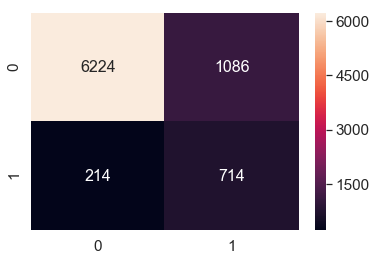

In [102]:
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

### XGBoost Model

In [103]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
parameters = {'objective':['binary:logistic'],
               'gamma': [0.5, 1, 1.5, 2, 5],
              'n_estimators': [10,18,30,35,100,200],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7,10,12,14,15],
              'min_child_weight': [1,5,10,14],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              }

xgb_clf = XGBClassifier()
clf = RandomizedSearchCV(xgb_clf,param_distributions=parameters,n_jobs=3,cv=10)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=3,
          param_distributions={'objective': ['binary:logistic'], 'gamma': [0.5, 1, 1.5, 2, 5], 'n_estimators': [10, 18, 30, 35, 100, 200], 'learning_rate': [0.03, 0.05, 0.07], 'max_depth': [5, 6, 7, 10, 12, 14, 15], 'min_child_weight': [1, 5, 10, 14], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [104]:
clf.best_params_

{'subsample': 0.8,
 'objective': 'binary:logistic',
 'n_estimators': 200,
 'min_child_weight': 10,
 'max_depth': 5,
 'learning_rate': 0.07,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [105]:
clf.best_score_

0.9162974203338391

In [ ]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["XGBoost", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

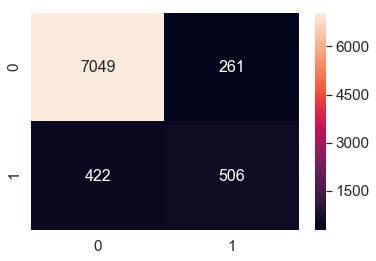

In [106]:
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Gaussian Naive Bayes

In [107]:
params = {}
clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [108]:
clf.best_score_

0.45023270059302717

In [109]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.454
Area under ROC on test data is : 0.697
Accuracy on test data is : 0.872


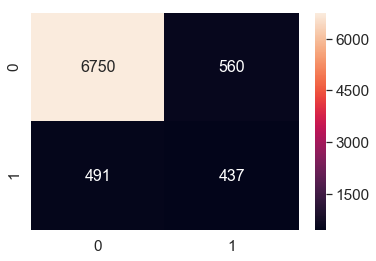

In [110]:
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Multinomial Naive Bayes

In [111]:
params = {
            "alpha" : [0.0, 0.1, 0.5, 1.0], 
            "fit_prior" : [True, False]
         }
clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0, 0.1, 0.5, 1.0], 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [112]:
clf.best_params_

{'alpha': 0.1, 'fit_prior': False}

In [113]:
clf.best_score_

0.3949726712844926

In [114]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

ktesting.loc[-1] = ["Multinomial Naive Bayes", f1, auc, acc]
ktesting.index = ktesting.index + 1
ktesting = ktesting.sort_index()

F1-Score on test data is : 0.383
Area under ROC on test data is : 0.711
Accuracy on test data is : 0.769


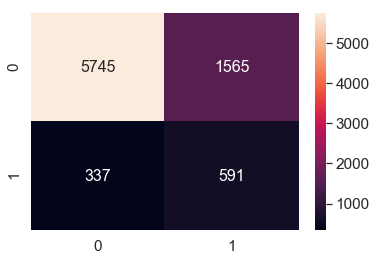

In [115]:
y_pred = clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [116]:
ktesting

,Classifier,F1-Score,AUC,Accuracy
0,Multinomial Naive Bayes,0.383268,0.711382,0.769119
1,Gaussian Naive Bayes,0.454026,0.697149,0.872420
2,AdaBoost,0.523460,0.810416,0.842195
3,Multinomial Naive Bayes,0.383728,0.713640,0.766448
4,Gaussian Naive Bayes,0.420401,0.726068,0.806871
5,XGBoost,0.383728,0.713640,0.766448
6,Multinomial Naive Bayes,0.383728,0.713640,0.766448
7,Gaussian Naive Bayes,0.420401,0.726068,0.806871
8,AdaBoost,0.592771,0.748670,0.917941
9,AdaBoost,0.515050,0.721289,0.894392


### Analysis of Bank Marketing data set
- We load the data set 
    - Number of rows is 41188 and numbers of columns is 21
- We did exploratory data analysis
    - Univariate analysis
    - Multivariate analysis
 - We plotted the confusion matrix
 - We show f1-score,auc, and accuracy
- We applied machine learning algorithm such **Logistic Regression, Decision Tree,Random Forest, Adaboost,Gaissian Naive Bayes,Multinomial Naive Bayes**
- We did feature selection using Chi-Square method
- We removed multicollinearity  features, After selection of feature and removing multi collinearity we applied **Logistic Regression, Decision Tree,Random Forest, Adaboost,Gaissian Naive Bayes,Multinomial Naive Bayes** 
